In [1]:
import pandas as pd
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # date type manage

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("datasets\extracted_events_NOAA.csv", index_col =0)
                #  index_col='Date').drop('Cumulative_cases', axis =1)
                
df.columns = [x.lower() for x in df.columns]

In [2]:
df["date"]= pd.to_datetime(df['datetime_end'])
df['year'] = df['date'].dt.strftime('%Y') # current date format ####-W##
df['month'] = df['date'].dt.strftime('%Y-%m') # current date format ####-W##


In [3]:
flood_df = df.loc[df['event_type'] =='Flood']

df_fl_annual_flood  = flood_df.loc[flood_df.state == "FLORIDA"]["year"].value_counts().reset_index()
df_fl_annual_flood = df_fl_annual_flood.sort_values(by='year').set_index("year").reset_index()
df_fl_annual_flood.head(1)


df_fl_month_flood  = flood_df.loc[flood_df.state == "FLORIDA"]["month"].value_counts().reset_index()
df_fl_month_flood = df_fl_month_flood.sort_values(by='month').set_index("month").reset_index()
df_fl_month_flood

,month,count
0,1996-01,1
1,1996-02,4
2,1996-03,1
3,1996-04,1
4,1996-06,10
...,...,...
151,2020-02,2
152,2020-04,1
153,2020-05,24
154,2020-06,20


## Plot Time-Series

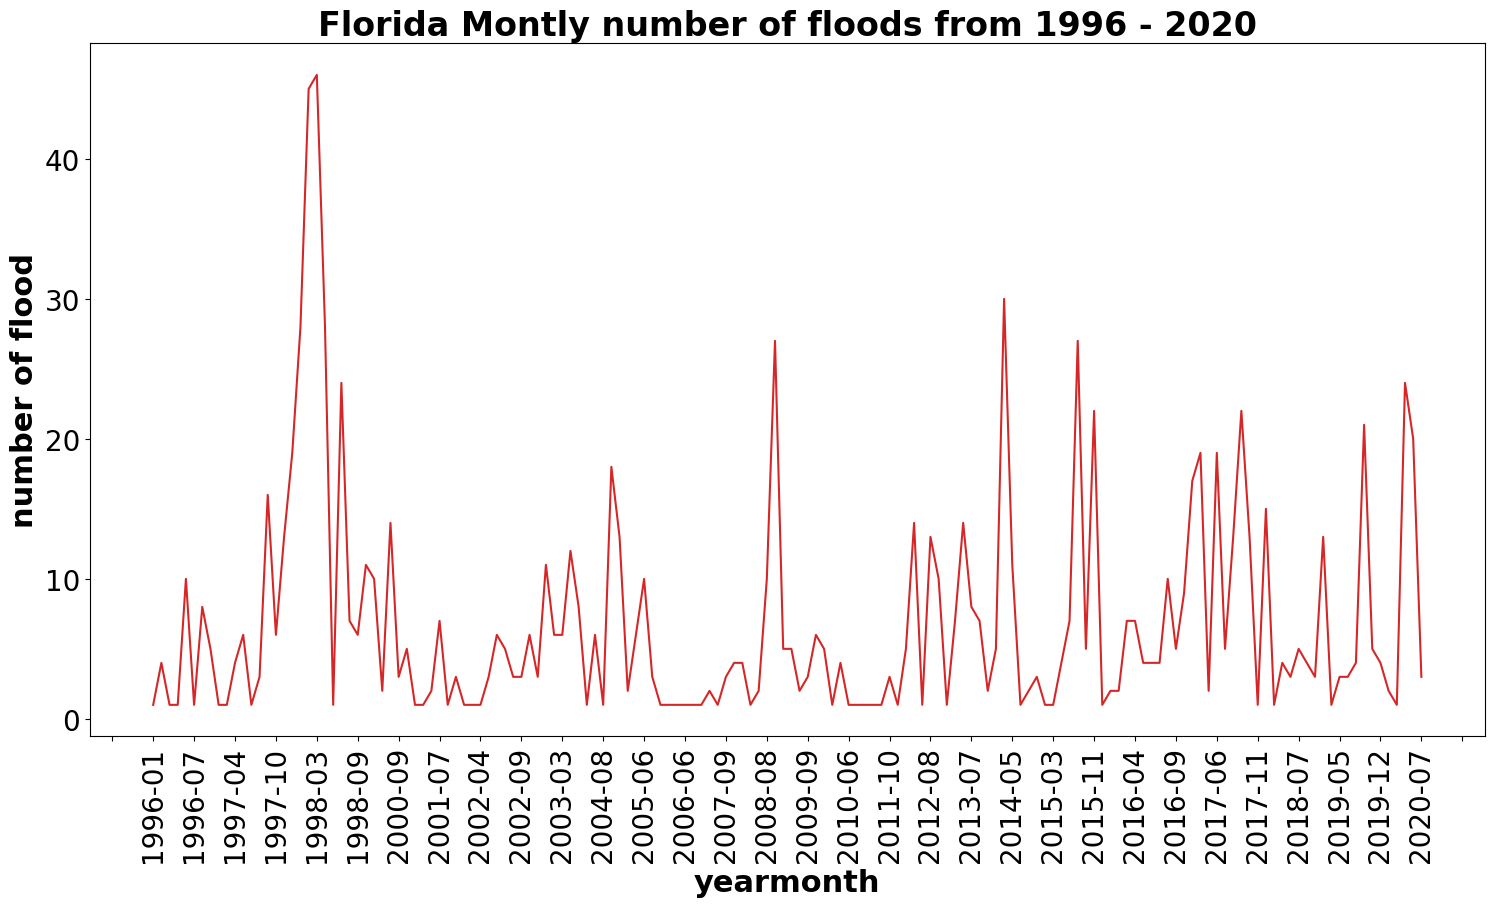

In [28]:
from matplotlib.ticker import MultipleLocator
def plot_df(df, x, y, title="", xlabel='daily', ylabel='Number New Cases', dpi=100):
    plt.figure(figsize=(18,9), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.xlabel(xlabel=xlabel, fontsize =22, weight ='bold')
    plt.ylabel(ylabel=ylabel, fontsize =22, weight ='bold')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation = 90, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.gca().xaxis.set_major_locator(MultipleLocator(5)) 
    plt.title(title, fontsize =24, weight ='bold')
    plt.show()
    

#monthly
plot_df(df_fl_month_flood, x= df_fl_month_flood['month'],
        xlabel= "yearmonth",
        ylabel= "number of flood",
        y=df_fl_month_flood['count'],
        title='Florida Montly number of floods from 1996 - 2020')
#annually
# plot_df(df_fl_annual_flood, x= df_fl_annual_flood['year'],
#         xlabel= "yearmonth",
#         ylabel= "number of flood",
#         y=df_fl_annual_flood['count'],
#         title='Florida annual number of floods from 1996 - 2020')

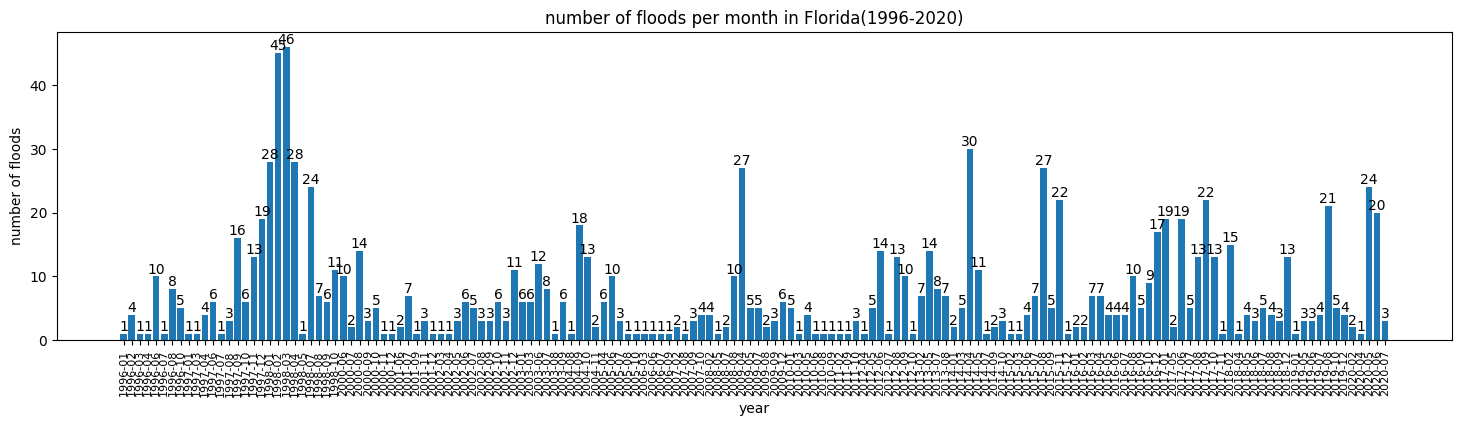

In [6]:


# create a barplot showing the number of injuires per quarter in 2018-2021
# function to add barplot labels.
def addlabels(x, y, labels):
    for i in range(len(x)):
        plt.text(i, y[i],  labels[i],  ha = 'center', va = 'bottom')
        

# #make ANNUAL barplot
# df_fl_annual_flood['number_of_flood_formated'] = df_fl_annual_flood['count'].astype(str)
# plt.figure(figsize=(18,4))
# plt.bar(x = df_fl_annual_flood['year'], height = df_fl_annual_flood['count'] )
# addlabels(df_fl_annual_flood['year'], df_fl_annual_flood['count'], df_fl_annual_flood['number_of_flood_formated'])


# plt.xlabel("year")
# plt.ylabel("number of floods")
# plt.title("number of floods per year in Florida(1996-2020)")
# plt.show()




     
#make monthly barplot
df_fl_month_flood['number_of_flood_formated'] = df_fl_month_flood['count'].astype(str)
plt.figure(figsize=(18,4))
plt.bar(x = df_fl_month_flood['month'], height = df_fl_month_flood['count'] )
addlabels(df_fl_month_flood['month'], df_fl_month_flood['count'], df_fl_month_flood['number_of_flood_formated'])


plt.xlabel("year")
plt.ylabel("number of floods")
plt.title("number of floods per month in Florida(1996-2020)")
plt.xticks(rotation =90)
plt.tick_params(axis='x', labelsize=8)
plt.show()

no noticeable seasonality, the 

## plot acf

(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 [Text(0, -1.0, '−1.00'),
  Text(0, -0.75, '−0.75'),
  Text(0, -0.5, '−0.50'),
  Text(0, -0.25, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00')])

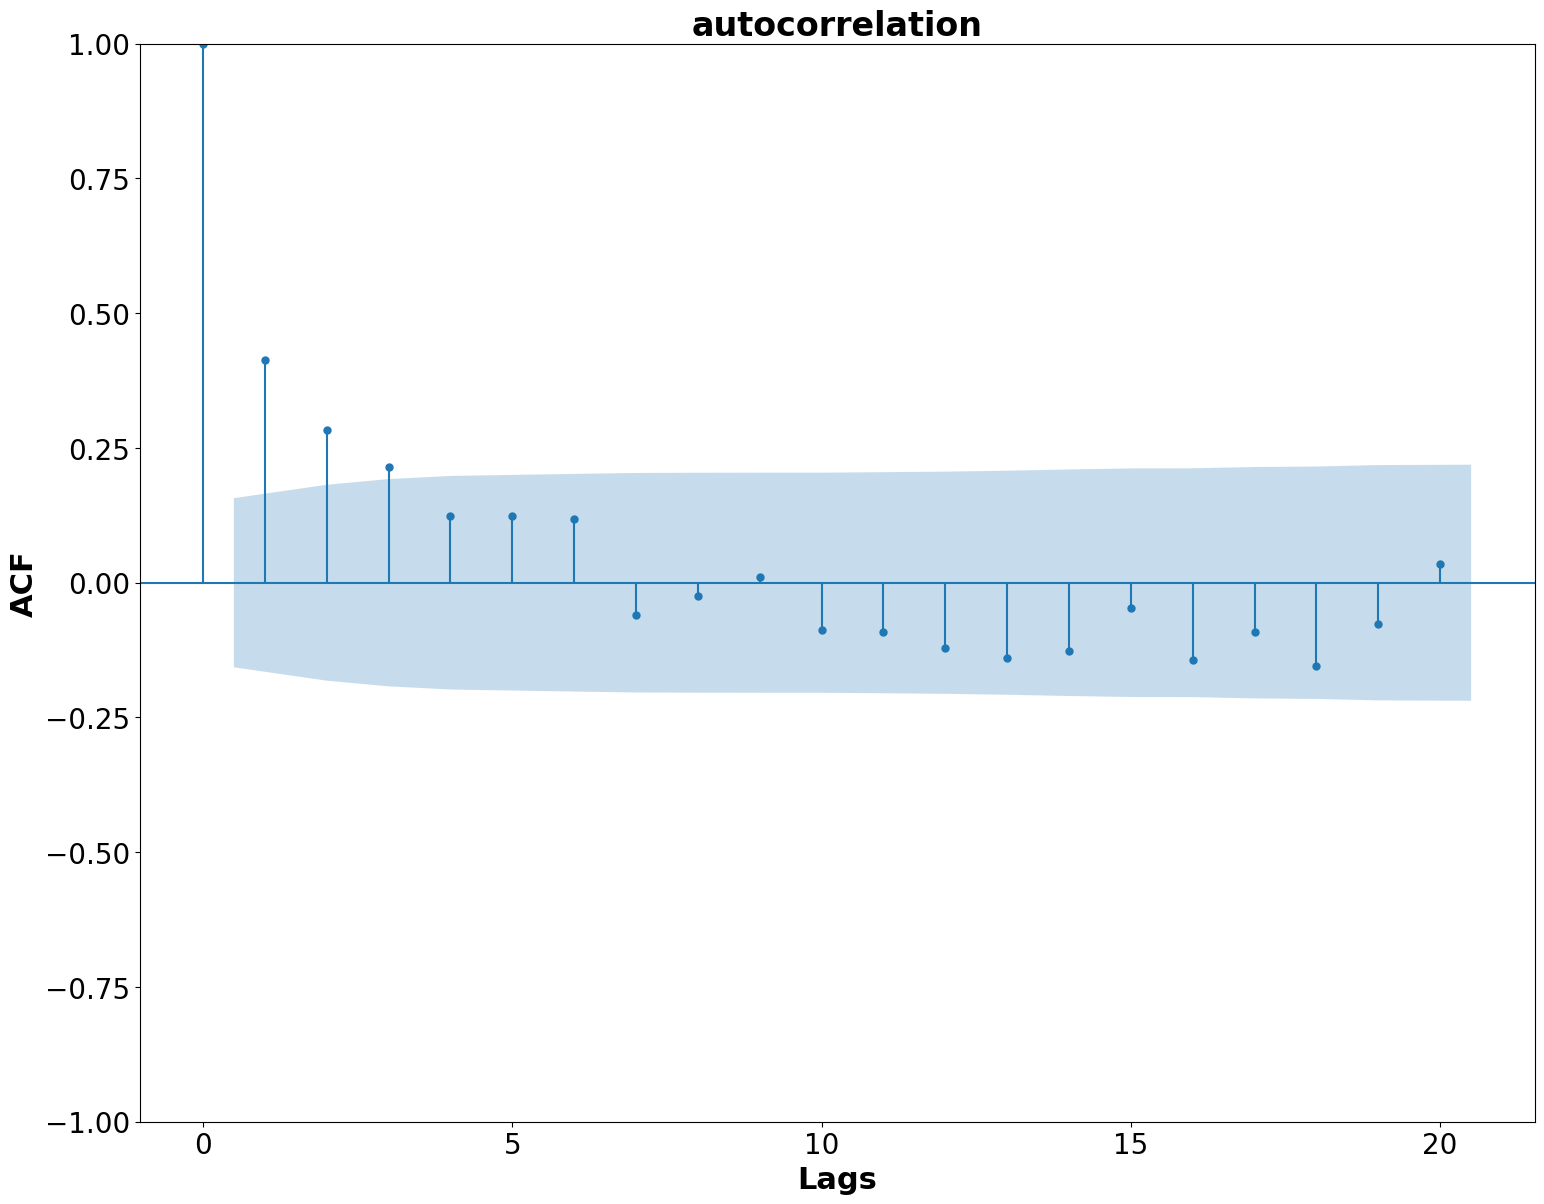

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
# #monthly
lags = len(df_fl_month_flood) - 1

fig, ax = plt.subplots(nrows=1, ncols =1, figsize=(18,14))
plot_acf(df_fl_month_flood["count"], ax= ax , alpha=0.05, lags=20)  # alpha=0.05 for 95% confidence interval
plt.xlabel("Lags",fontsize=22,weight ='bold')
plt.title('autocorrelation', fontsize =24,weight ='bold')
plt.ylabel('ACF',fontsize =22, weight ='bold')
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)

#annually
# lags = len(df_fl_annual_flood) - 1

# fig, ax = plt.subplots(figsize=(18,5))
# plot_acf(df_fl_annual_flood["count"], ax=ax, alpha=0.05, lags=20)  # alpha=0.05 for 95% confidence interval
# plt.show()



## creating train and test set

In [23]:

#Creating train and test set 
#montly
train = df_fl_month_flood[0:int(len(df_fl_month_flood)*0.95)] 
test= df_fl_month_flood[int(len(df_fl_month_flood)*0.95):]

# #annual
# train = df_fl_annual_flood[0:int(len(df_fl_annual_flood)*0.95)] 
# test= df_fl_annual_flood[int(len(df_fl_annual_flood)*0.95):]

In [24]:
training_set = np.array(train["count"]).reshape(-1,1)
testing_set = np.array(test["count"]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.transform(testing_set)

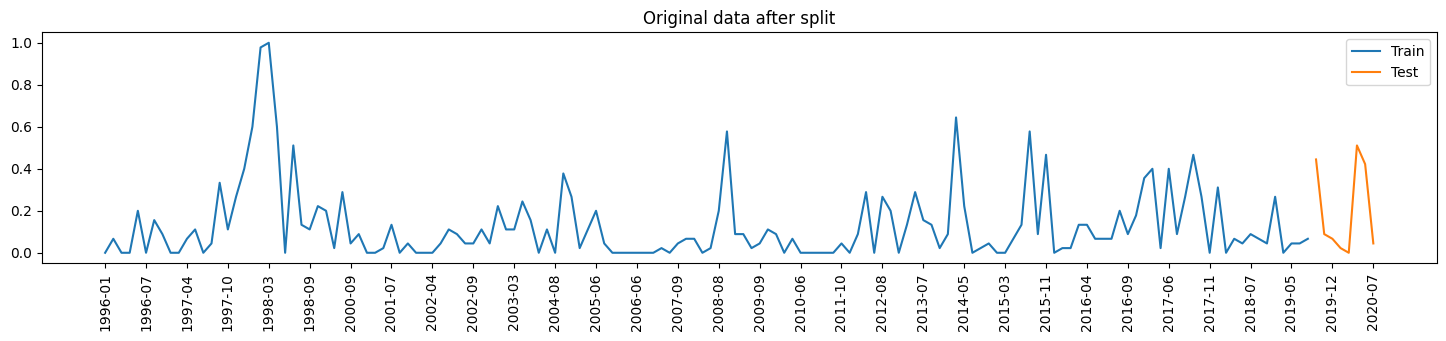

In [25]:
# print("\n Training data start at \n")
# print (train[train.month == train.month.min()],['Year','Month'])
# print("\n Training data ends at \n")
# print (train[train.month == train.month.max()],['Year','Month'])

# print("\n Test data start at \n")
# print (test[test.month == test.month.min()],['Year','Month'])

# print("\n Test data ends at \n")
# print (test[test.month == test.month.max()],['Year','Month'])

plt.figure(figsize=(18,3))
plt.plot(train['month'], training_set_scaled, label='Train')
plt.plot(test['month'], testing_set_scaled, label='Test')
plt.legend(loc='best')
plt.title('Original data after split')
plt.xticks(range(0, len(df_fl_month_flood), 5), rotation=90)
plt.show()

# Holt's AAA model

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


## fit model
pred = Holt(np.asarray(train['count']), ).fit(optimized=True)


print(pred.params)


print('== Holt\'s Linear Trend Model Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 7)
print('Smoothing Level (Alpha): ', alpha_value)
print('Smoothing Slope (Beta): ', np.round(pred.params['smoothing_trend'], 7))
print('Initial Level: ', np.round(pred.params['initial_level'], 7))
print('Initial Slope: ', np.round(pred.params['initial_trend'], 7))
print('')


### Forecast for next 7 months
y_pred =  pred.forecast(steps = len(test))
df_pred = pd.DataFrame({'Y_hat':y_pred,'Y':test['count']})
print(df_pred)

{'smoothing_level': 0.4831562261450736, 'smoothing_trend': 0.05473579460465412, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1.0, 'initial_trend': 3.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
== Holt's Linear Trend Model Parameters ==

Smoothing Level (Alpha):  0.4831562
Smoothing Slope (Beta):  0.0547358
Initial Level:  1.0
Initial Slope:  3.0

        Y_hat   Y
148  3.308375  21
149  3.109797   5
150  2.911219   4
151  2.712641   2
152  2.514064   1
153  2.315486  24
154  2.116908  20
155  1.918330   3


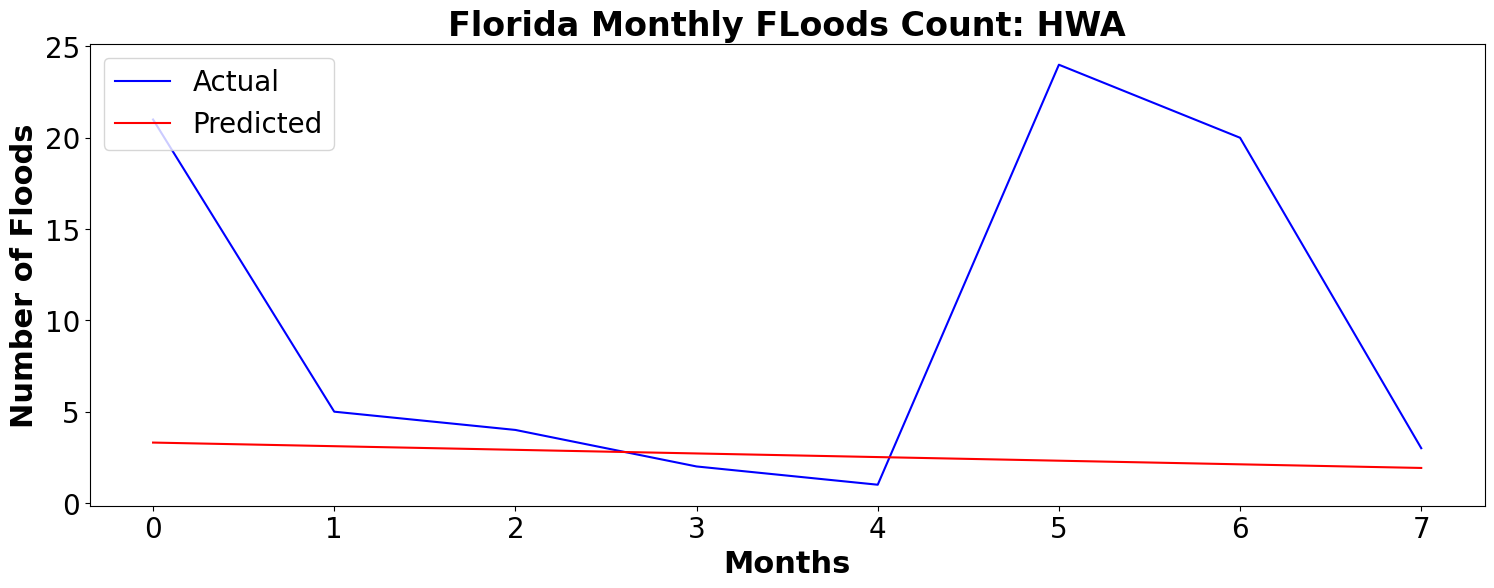

In [27]:

# plot Real flood count over time and Predicted flood count over time in the same plot/figure
plt.figure(figsize=(18,6))
# Plot the actual values
plt.plot(df_pred.Y.values, color='blue', label='Actual')
# Plot the predicted values
plt.plot(df_pred.Y_hat.values, color='red', label='Predicted')

# Add title and labels
plt.title('Florida Monthly FLoods Count: HWA', fontsize=24,  weight ='bold')
plt.xlabel('Months', fontsize=22,  weight ='bold')
plt.ylabel('Number of Floods', fontsize=22,  weight ='bold')
plt.xticks(np.arange(len(testing_set), step =1), fontsize =20)
plt.yticks(fontsize =20)
# Add legend
plt.legend(loc='upper left',fontsize = 20)

# Show the plot
plt.show()


In [28]:
from sklearn.metrics import root_mean_squared_error

df_model_opt =  pd.DataFrame({'Y_hat':y_pred,'Y':test['count'].values})
rmse_opt    =  root_mean_squared_error(df_model_opt.Y, df_model_opt.Y_hat)


print("For alpha = %1.2f,  RMSE is %3.4f" %(alpha_value, rmse_opt))

For alpha = 0.48,  RMSE is 11.7885


In [29]:
y_pred

array([3.30837476, 3.109797  , 2.91121925, 2.7126415 , 2.51406375,
       2.31548599, 2.11690824, 1.91833049])

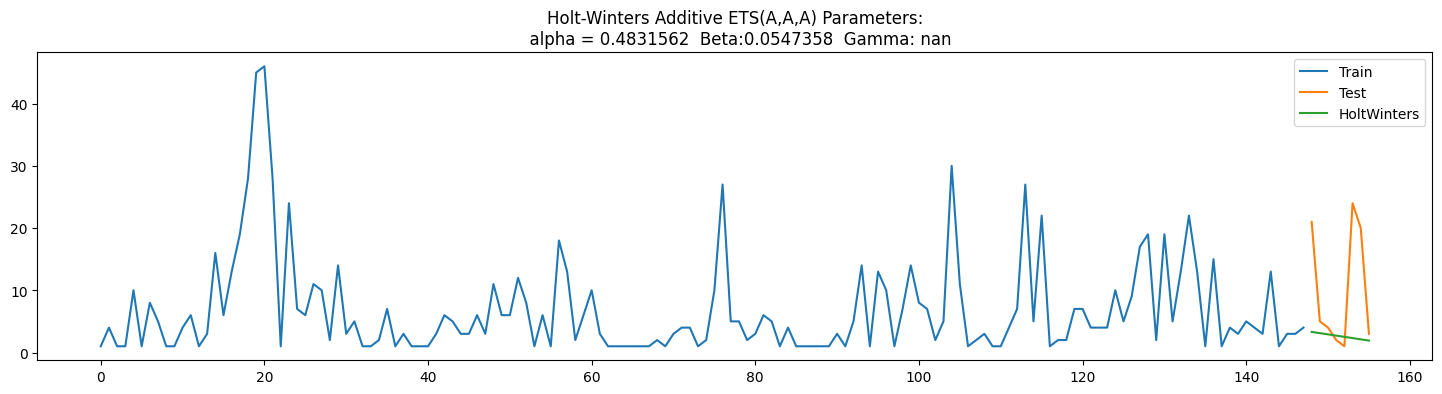

In [30]:
pred_HoltW = test.copy()

pred_HoltW['HoltW'] = pred.forecast(len(test['count']))
plt.figure(figsize=(18,4))
plt.plot(train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(pred_HoltW['HoltW'], label='HoltWinters')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(np.round(pred.params['smoothing_trend'], 7)) +
          '  Gamma: ' + str(np.round(pred.params['smoothing_seasonal'], 7)))
plt.legend(loc='best')
plt.show()

# RNN LSTM method

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
training_set = train.iloc[:,1:2].values
testing_set = test.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


### Creating a data structure with 4 timesteps and 1 output

In [32]:
X_train = []
y_train = []
for i in range(4, len(training_set)):
    X_train.append(training_set_scaled[i-4:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
# regressor = Sequential()


# # add the first lstm
# regressor.add(LSTM(units =256, return_sequences =True))
# regressor.add(Dropout(0.2))
# # add the second lstm
# regressor.add(LSTM(units = 128, return_sequences =True))
# regressor.add(Dropout(0.2))
# # add the third lstm
# regressor.add(LSTM(units = 64, return_sequences =True))
# regressor.add(Dropout(0.2))
# # add the fourth lstm
# regressor.add(LSTM(units = 32, return_sequences =True))
# regressor.add(Dropout(0.2))
# # add the fifth lstm
# regressor.add(LSTM(units = 16))
# regressor.add(Dropout(0.2))
# # adding the output layer
# regressor.add(Dense(units = 1))

## Compiling the RNN with appropriate optimizer and loss function
import tensorflow as tf
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

regressor.compile(optimizer='adam', loss='mse', metrics=[root_mean_squared_error])

regressor.fit(X_train, y_train, epochs=200
              )

testing_set

### pickle a model

In [ ]:
import pickle
# save the model to disk
filename = 'rnn_lstm_fl_flood_count.sav'
pickle.dump(regressor, open(filename, 'wb'))

### load the model from disk

In [11]:
import pickle
from sklearn.metrics import root_mean_squared_error
regressor = pickle.load(open('rnn_lstm_fl_flood_count.sav', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2024-10-27 13:59:48         5944
metadata.json                                  2024-10-27 13:59:48           64
variables.h5                                   2024-10-27 13:59:48      6373432
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\dropout_4
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...layers\lstm_3
......vars
...layers\lstm_3\cell
......vars
.........0
.........1
.........2
...layers\l

## make predictions and visualizing the results

In [12]:
dataset_total = pd.concat((train['count'], test['count']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testing_set) - 4:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(4, len(inputs)):
    X_test.append(inputs[i-4:i, 0])
# reshape the test data and make prediction for the stock price
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# make predictions on the test data
y_preds = regressor.predict(X_test)

# inverse transform tthe minmaxscaler
y_preds = sc.inverse_transform(y_preds)

1/1 [==============================] - 2s 2s/step


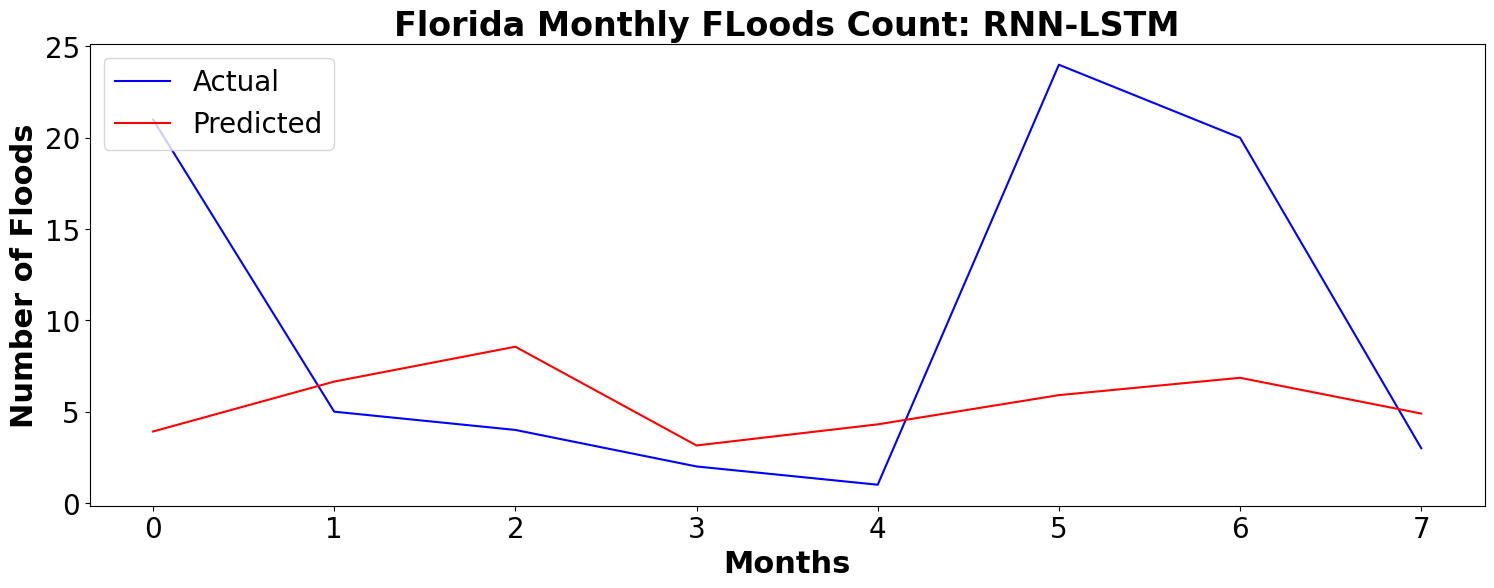

In [13]:
# plot Real flood count over time and Predicted flood count over time in the same plot/figure
plt.figure(figsize=(18,6))
# Plot the actual values
plt.plot(testing_set, color='blue', label='Actual')
# Plot the predicted values
plt.plot(y_preds, color='red', label='Predicted')

# Add title and labels
plt.title('Florida Monthly FLoods Count: RNN-LSTM', fontsize =24, weight ='bold')
plt.xlabel('Months', fontsize =22, weight ='bold')
plt.ylabel('Number of Floods', fontsize =22, weight ='bold')
plt.xticks(np.arange(len(testing_set), step =1), fontsize =20)
plt.yticks(fontsize =20)
# Add legend
plt.legend(loc = 'upper left', fontsize =20)

# Show the plot
plt.show()





In [14]:
from sklearn.metrics import root_mean_squared_error

df_model_opt =  pd.DataFrame({'Y_hat':y_preds.flatten(),'Y':test['count'].values})
rmse_opt    =  root_mean_squared_error(df_model_opt.Y, df_model_opt.Y_hat)


# y_preds.flatten()
# test['new_cases']
print("RMSE is %3.4f" %(rmse_opt))

RMSE is 10.1947


# Comparing models train performance

In [15]:
y_pred_train = regressor.predict(X_train)
y_pred_train =sc.inverse_transform(y_pred_train)

NameError: name 'X_train' is not defined

5/5 [==============================] - 0s 9ms/step


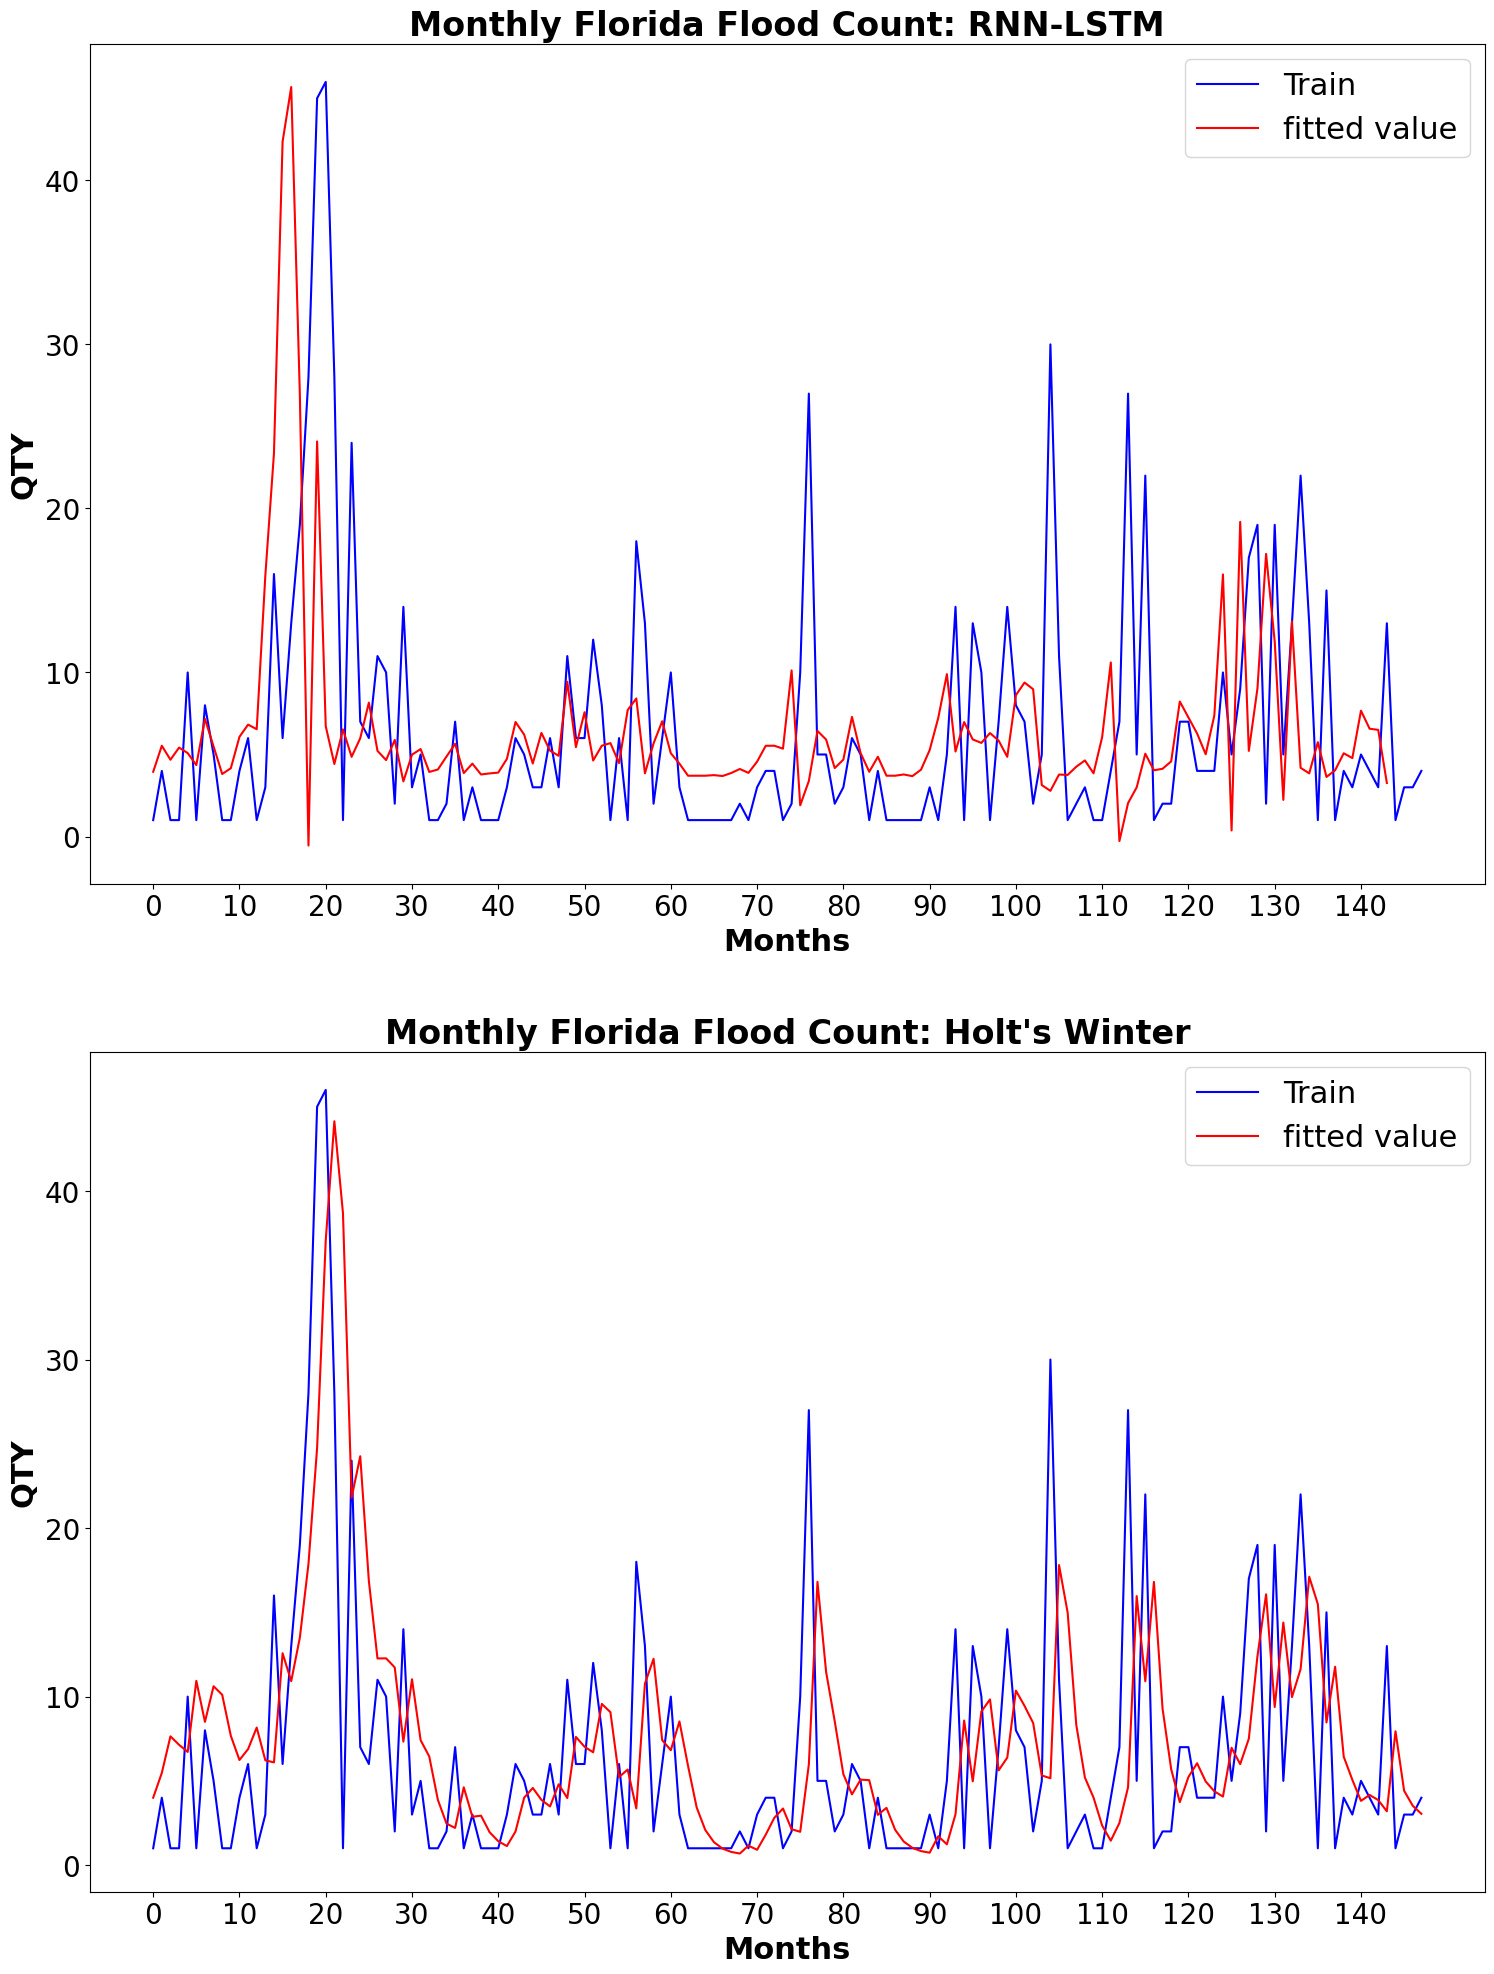

In [34]:


# make predictions on the test data
y_pred_train = regressor.predict(X_train)

# inverse transform tthe minmaxscaler
y_pred_train = sc.inverse_transform(y_pred_train)
# # Create and fit the model
# print(pred.params)
# print('')

# plt.plot(train['count'], label='Train')
# plt.plot(y_pred_train, label='fittedvalue')
# plt.ylabel('QTY')
# plt.suptitle("RNN-LSTM")
# plt.title("Daily World's New Monkeypox Cases")

# plt.xlabel('Days')
# plt.legend(loc='best')
# plt.show()


fig, axs = plt.subplots(2, 1, figsize=(18, 24), gridspec_kw={'hspace': 0.2})

# Plot on axs[0] and axs[1]
axs[0].plot(train['count'], label='Train',color ='b')
axs[0].plot(y_pred_train, label='fitted value', color ='r')
axs[0].set_title("Monthly Florida Flood Count: RNN-LSTM", fontsize=24, fontweight='bold')
axs[0].set_xlabel("Months", fontweight='bold', fontsize=22)
axs[0].set_ylabel("QTY", fontweight='bold', fontsize=22)
axs[0].legend(loc='best', fontsize=22)
axs[0].set_xticks(np.arange(len(training_set), step =10))
axs[0].tick_params(axis='x', labelsize=20)
axs[0].tick_params(axis='y', labelsize=20)

axs[1].plot(train['count'], label='Train', color ='b')
axs[1].plot(pred.fittedvalues, label='fitted value', color ='r')
axs[1].set_title("Monthly Florida Flood Count: Holt's Winter", fontsize=24, fontweight='bold')
axs[1].set_xlabel('Months', fontweight='bold', fontsize=22)
axs[1].set_xticks(np.arange(len(training_set), step =10))
axs[1].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[1].set_ylabel("QTY", fontweight='bold', fontsize=22)
axs[1].legend(loc='best', fontsize=22)


plt.show()








In [48]:
#rnn-lstm
root_mean_squared_error(train['count'][:len(y_pred_train)], y_pred_train)


9.020581205956528

In [49]:
#holt's additive
root_mean_squared_error(train['count'], pred.fittedvalues)


7.656190137979699